## Predicting Adaptability Level of the Student in a Remote Learning Environment

### Project Scope:
During the past two years, the COVID-19 pandemic has disrupted education across the globe. Many schools adopted remote learning as the primary delivery mode in response to this highly transmissible disease. The intention was to reach all the students and ensure everyone had the chance to learn. However, there are challenges to overcome, including two-way interaction between instructor and students, availability of the technologies, and so on. ​

Students with different backgrounds might have a significant gap in adaptability to online learning. For example, students from developed countries (USA, Canada) have stable internet connections and devices to participate, whereas third-world countries might have difficulties having reliable internet/ devices. Therefore, some groups were more likely to have higher adaptability levels than others.


Your Role:

Build a predictive model that predict the adaptivity level using different factors (ie gender, age, financial Condition, etc).


Specifics:

Machine Learning task: Classification model \
Target variable: Adaptivity level \
Input variables: Refer to data dictionary below \
Success Criteria: Accuracy of 80% and above

### Data Dictionary:

The dataset contains several parameters which were recorded about the students. The parameters included are :

**Gender:** Boy or Girl \
**Age:** Age in range \
**Education Level:** Education institution level (School, University, etc)\
**Institution Type:** Government or Non-government\
**IT Student:** Whether the student is studying in IT-related fields \
**Location in Town:** Is student's location in town\
**Load-shedding:** Level of load shedding (Electrcity)\
**Financial Condition:** Financial condition of family\
**Internet Type:** Internet type used mostly in device (Cellular/ Wi-Fi)\
**Network Type:** Network connectivity type (3G, 4G)\
**Class Duration:** Daily class duration in hour(s)\
**Self LMS:** Institution’s own Learning Management System availability\
**Device:** Device used mostly in class\
**Adaptivity level:** Adaptability level of the student (High, Moderate, Low)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('students_adaptability_level_online_education.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [3]:
#Check the structure of the dataset including data types, number of rows, columns and non-null records.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [4]:
#Check if any missing values
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

## Data Visalization
Plotting charts help us understand the dataset easily compared to the rows and columns. Let's check the dataset through various types of plots.

In [5]:
#Check the distribution of the target variable
df['Adaptivity Level'].value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

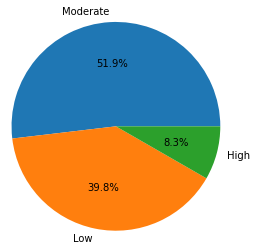

In [6]:
# plot the occurrence of different adaptivity level in the dataset
plt.pie(df['Adaptivity Level'].value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['Moderate', 'Low','High'])


# display the plot
plt.show()

**Observations**

* From the above pie plot, it can be seen that the data has a high proportion for Moderate followed by Low.The dataset is not balanced regarding the target variable

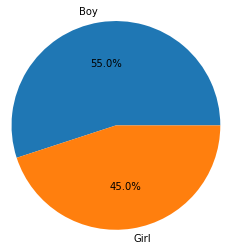

In [7]:
plt.pie(df['Gender'].value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['Boy', 'Girl'])

plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

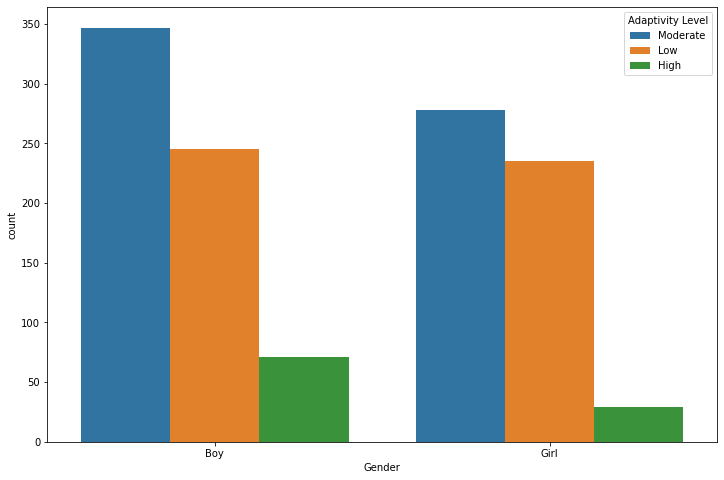

In [8]:
plt.figure(figsize=(12,8))

sns.countplot(df["Gender"],hue=df["Adaptivity Level"])

**Observations**

* There is no siginificant differences between the gender in terms of Adaptivity Level

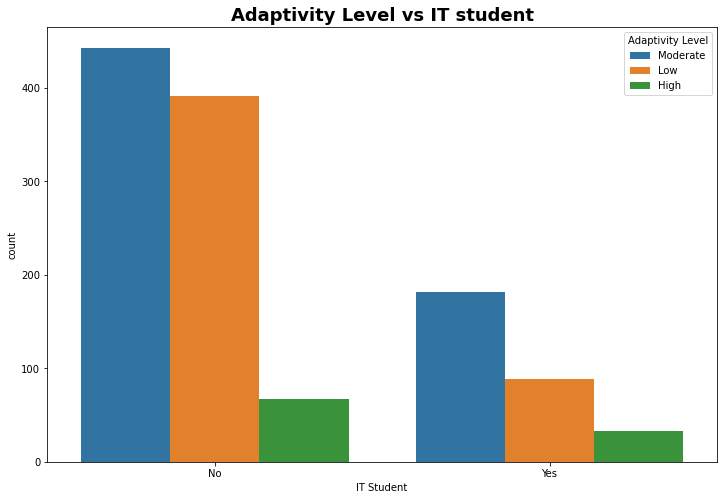

In [9]:
# See if the correlation of Adaptivity level and IT student.

plt.figure(figsize=(12,8))

sns.countplot(df["IT Student"],hue=df["Adaptivity Level"])
plt.title('Adaptivity Level vs IT student', fontsize=18, fontweight='bold', color='black')
plt.show()

**Observation**
* Most of the IT and Non-IT students' adaptivity levels are Moderate, which indicates the technical background is less likely to affect the adaptivity level.
* Both share similar performance on adaptivity level with the lowest number in High and highest number in Moderate.

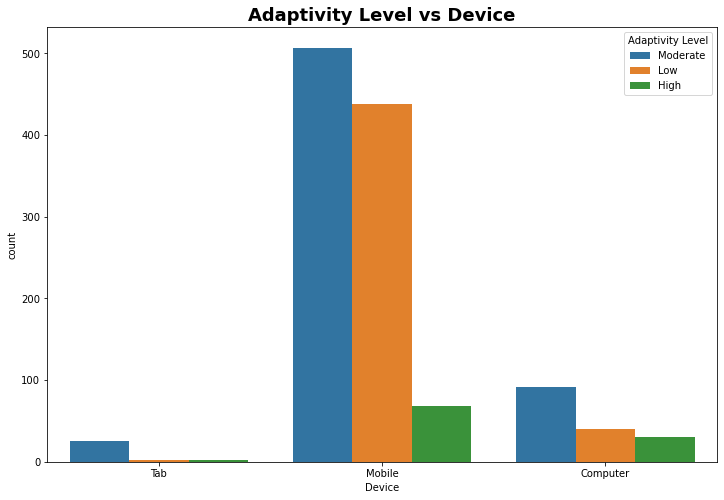

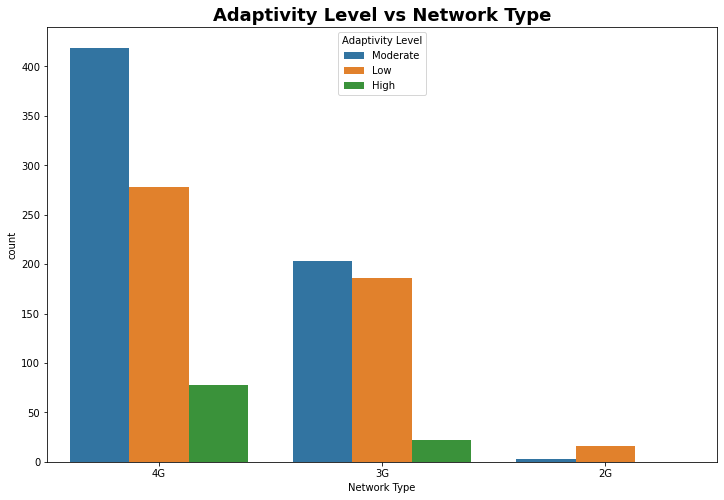

In [10]:
plt.figure(figsize=(12,8))

sns.countplot(df["Device"],hue=df["Adaptivity Level"])
plt.title('Adaptivity Level vs Device', fontsize=18, fontweight='bold', color='black')

plt.show()

plt.figure(figsize=(12,8))

sns.countplot(df["Network Type"],hue=df["Adaptivity Level"])
plt.title('Adaptivity Level vs Network Type', fontsize=18, fontweight='bold', color='black')

plt.show()

**Observation**
* There is no huge difference between Wifi and Mobile Data regarding to Adaptivity Level
* Majority of students are using 4G network with Moderate adaptivity level.
* Both Network & Internet Type seem to have less influence over adaptivity level

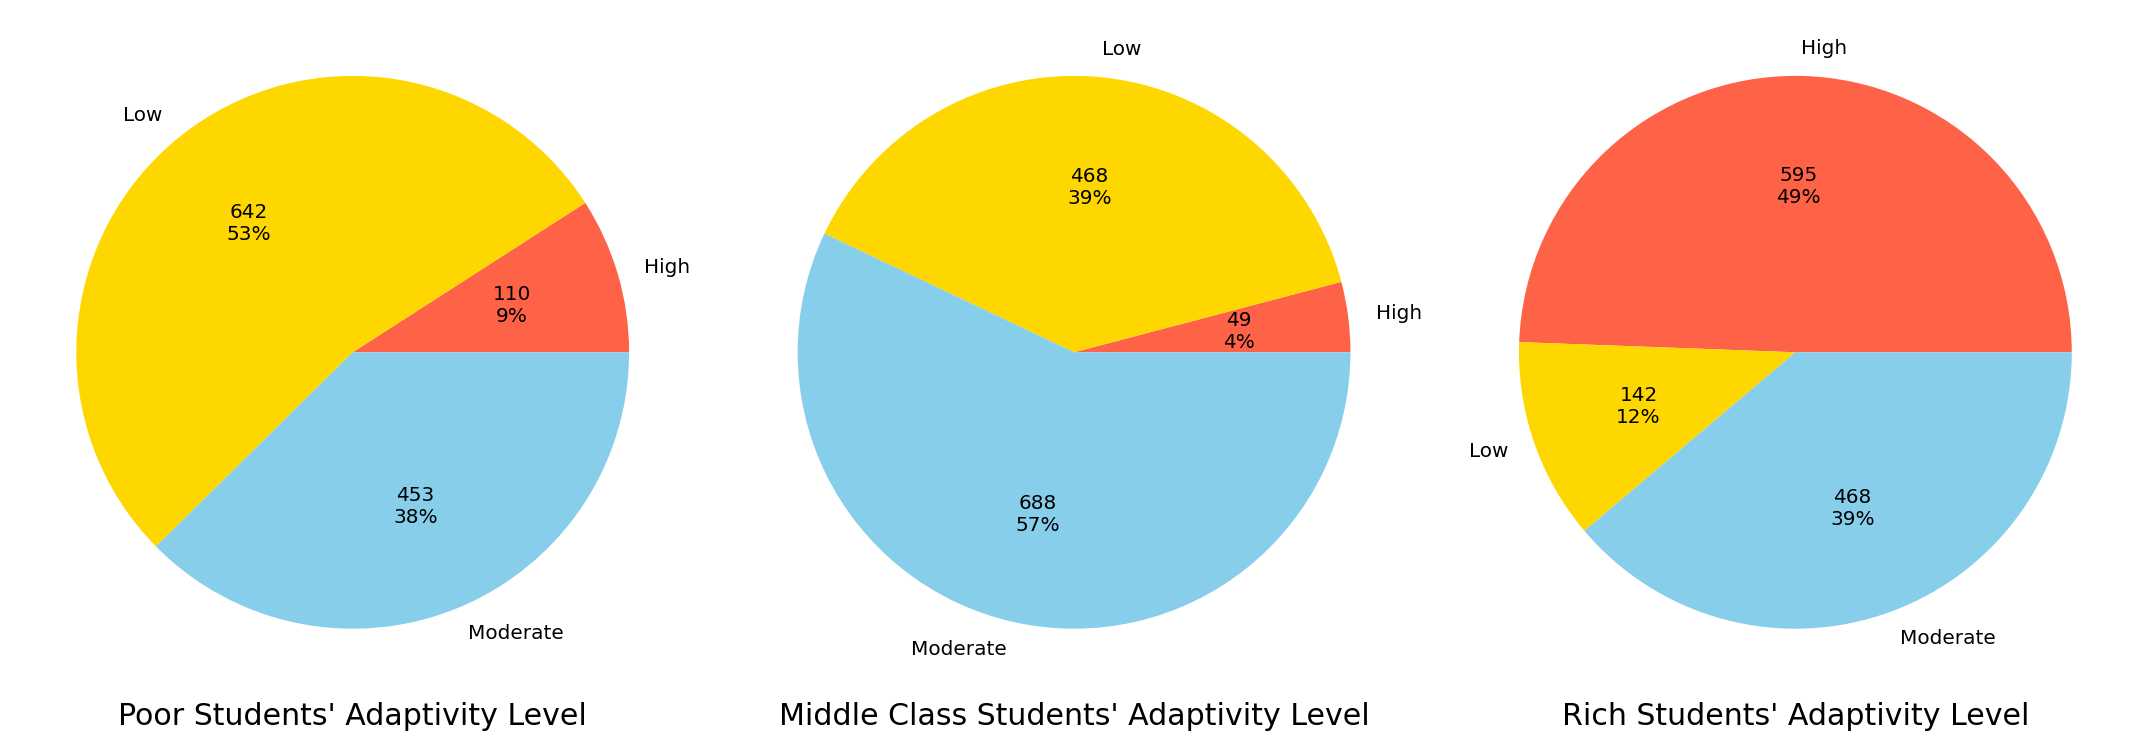

In [11]:
#Check if the Financial Condition and Adaptivity are correlated
#.set_index(Num_Diff_Financial.index // 3)['counts']
x = df['Financial Condition']

def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

Num_Poor_stud = df[x == 'Poor'].groupby('Adaptivity Level')['Financial Condition'].count()
Num_Mid_stud = df[x == 'Mid'].groupby('Adaptivity Level')['Financial Condition'].count()
Num_Rich_stud = df[x == 'Rich'].groupby('Adaptivity Level')['Financial Condition'].count()

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(30, 10))

Num_Poor_stud.plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue'], ax=ax1)
Num_Mid_stud.plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['tomato', 'gold', 'skyblue'], ax=ax2)
Num_Rich_stud.plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['tomato', 'gold', 'skyblue'], ax=ax3)

ax1.set_xlabel("Poor Students' Adaptivity Level", size=30)
ax2.set_xlabel("Middle Class Students' Adaptivity Level", size=30)
ax3.set_xlabel("Rich Students' Adaptivity Level", size=30)
ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")
plt.tight_layout()
plt.show()

**Observation**
* Nearly half of the rich students perform great at adapting to online education
* Over half of the poor students have an unsatisfactory result in adapting to online education
* Financial Condition seems to have a positive correlation with Adaptivity Level

## Building Classification Model

### Create Dummy Variables
Now that we finished the data exploration, it's time to build our model to predict the adaptivity mode. Most Machine Learning algorithms cannot handle text data, for example, Neural Network and Logistic Regression. Therefore, we need to create what are called dummy variables for all our categorical features.

In [12]:
# Transformoing non-numerical labels to numerical labels (nominal number) .
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = df.columns

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

### Remark
Label Encoder assigned a unique integer based on alphabetical ordering

In [13]:
#Check if the dummy variable was created correctly.
df.head(2)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2


In [14]:
# It's always nice to check the tail of data to enhance the confidence that the data was transformed correctly.
df.tail(2)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
1203,1,2,0,1,0,0,1,0,1,2,1,0,1,1
1204,1,1,1,1,0,1,1,1,0,1,1,0,1,2


### Data Partition

In [15]:
# Seperate the input features and target variable
x = df.drop('Adaptivity Level',axis=1)
y = df['Adaptivity Level']

In [16]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=123)

In [17]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((964, 13), (241, 13), (964,), (241,))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               1205 non-null   int32
 1   Age                  1205 non-null   int32
 2   Education Level      1205 non-null   int32
 3   Institution Type     1205 non-null   int32
 4   IT Student           1205 non-null   int32
 5   Location             1205 non-null   int32
 6   Load-shedding        1205 non-null   int32
 7   Financial Condition  1205 non-null   int32
 8   Internet Type        1205 non-null   int32
 9   Network Type         1205 non-null   int32
 10  Class Duration       1205 non-null   int32
 11  Self Lms             1205 non-null   int32
 12  Device               1205 non-null   int32
 13  Adaptivity Level     1205 non-null   int32
dtypes: int32(14)
memory usage: 66.0 KB


In [19]:
from flaml import AutoML
automl = AutoML( time_budget = 60,
    metric = 'accuracy',
    task = 'classification')

In [20]:
automl.fit(X_train = xtrain, y_train = ytrain, time_budget = 60, metric= 'accuracy',
    task ='classification', verbose=1)

In [21]:
print(automl.model)

In [22]:
print(automl.best_config)

{'n_estimators': 71, 'num_leaves': 142, 'min_child_samples': 2, 'learning_rate': 0.8020558621295225, 'log_max_bin': 7, 'colsample_bytree': 0.6425112053693546, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.0015721761048767123}


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(ytest, automl.predict(xtest)))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.93      0.91      0.92        93
           2       0.90      0.94      0.92       126

    accuracy                           0.91       241
   macro avg       0.89      0.86      0.87       241
weighted avg       0.91      0.91      0.91       241



* Target Index 0: High
* Target Index 1: Low
* Target Index 2: Moderate

There is an unequal distribution of classes within the dataset, and it is necessary to use precision and recall to evaluate the performance of the model. However, the number of target value "High" is relatively low, causing the bad performance in classifying 0.

In [24]:
cm = confusion_matrix(ytest, automl.predict(xtest))

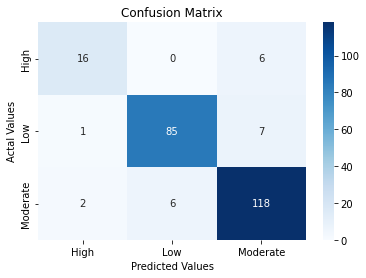

In [25]:
cm_df = pd.DataFrame(cm,
                     index = ['High','Low','Moderate'], 
                     columns = ['High','Low','Moderate'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Confusion Matrix shows a much clearer picture of the model's performance. Instead of displaying the label, the matrix indicates the actual values of the target.

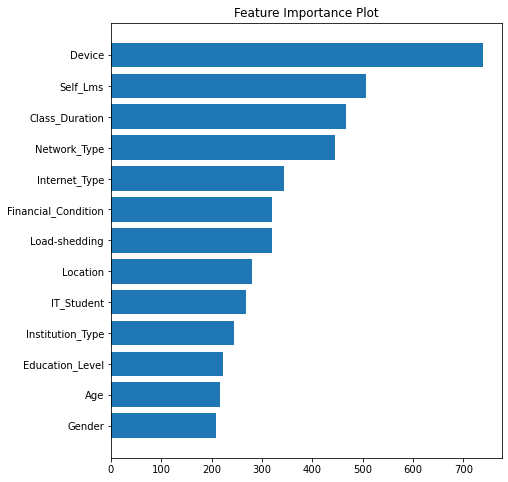

In [26]:
feat_importances = automl.model.estimator.feature_importances_

plt.figure(figsize=(7,8))
sorted_idx = feat_importances.argsort()
plt.barh(automl.model.estimator.feature_name_, feat_importances[sorted_idx])
plt.title('Feature Importance Plot')
plt.show()

### Observation

* In an imbalanced dataset without oversampling, Device is the most importance features and affect student's adaptability level the most
* Gender has the least influence over the adaptability level

### Perform Oversampling

* Using SMOTE to oversample the target value to better train the model
* SMOTE on training set cause an equally distributed classes in test data doesn't make sense

In [36]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()
xtrain, ytrain = oversample.fit_resample(xtrain, ytrain)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=2, n=625 (51.867%)
Class=1, n=480 (39.834%)
Class=0, n=100 (8.299%)


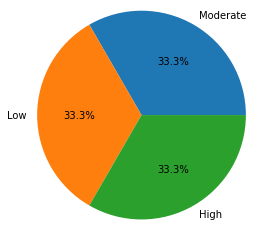

In [37]:
plt.pie(ytrain.value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['Moderate', 'Low','High'])


# display the plot
plt.show()

In [38]:
ytrain.value_counts()

1    499
2    499
0    499
Name: Adaptivity Level, dtype: int64

In [39]:
automl2 = AutoML( time_budget = 60,
    metric = 'accuracy',
    task = 'classification')

In [40]:
automl2.fit(X_train = xtrain, y_train = ytrain, time_budget = 60, metric= 'accuracy',
    task ='classification', verbose=1)

In [41]:
print(automl2.model)

In [42]:
print(automl2.get_estimator_from_log)

<bound method AutoML.get_estimator_from_log of AutoML(append_log=False, auto_augment=True, custom_hp={}, early_stop=False,
       ensemble=False, estimator_list='auto', eval_method='auto',
       fit_kwargs_by_estimator={}, hpo_method='auto', keep_search_state=False,
       learner_selector='sample', log_file_name='', log_training_metric=False,
       log_type='better', max_iter=None, mem_thres=4294967296,
       metric='accuracy', metric_constraints=[], min_sample_size=10000,
       model_history=False, n_concurrent_trials=1, n_jobs=-1, n_splits=5,
       pred_time_limit=inf, retrain_full=True, sample=True, split_ratio=0.1,
       split_type='auto', starting_points='static', task='classification', ...)>


In [43]:
print(automl2.best_config)

{'n_estimators': 31, 'num_leaves': 74, 'min_child_samples': 4, 'learning_rate': 1.0, 'log_max_bin': 8, 'colsample_bytree': 0.5643435277784351, 'reg_alpha': 0.002667476464889519, 'reg_lambda': 0.0009765625}


In [44]:
print(classification_report(ytest, automl2.predict(xtest)))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        22
           1       0.93      0.91      0.92        93
           2       0.95      0.87      0.90       126

    accuracy                           0.90       241
   macro avg       0.84      0.93      0.87       241
weighted avg       0.91      0.90      0.90       241



### Observation

* Performance of the model after performing oversampling is similar to the model without oversampling
* However, the recall of value 0 (High) increased rapidly and was marked as one, which means perfectly identifying positive value as shown in below Confusion Matrix.

In [51]:
cm2 = confusion_matrix(ytest, automl2.predict(xtest))

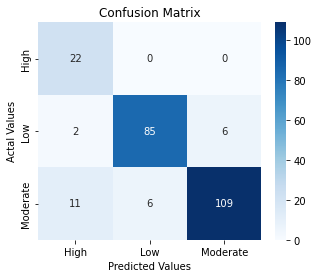

In [52]:
cm_df2 = pd.DataFrame(cm2,
                     index = ['High','Low','Moderate'], 
                     columns = ['High','Low','Moderate'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df2, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

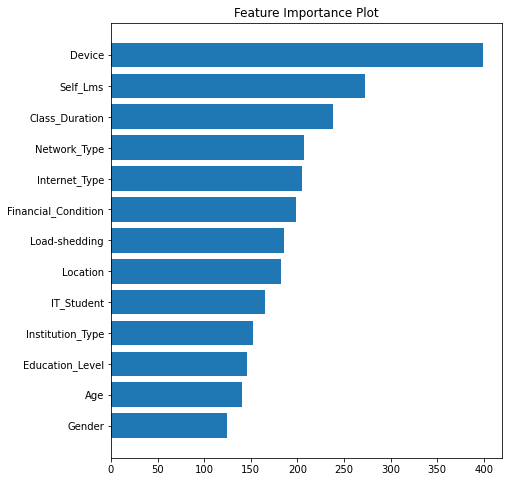

In [53]:
feat_importances = automl2.model.estimator.feature_importances_

plt.figure(figsize=(7,8))
sorted_idx = feat_importances.argsort()
plt.barh(automl2.model.estimator.feature_name_, feat_importances[sorted_idx])
plt.title('Feature Importance Plot')
plt.show()

### Obesrvation

* The Order of Feature Importance between the model with or without oversampling is the same
* Just the level of importance has minor differences.